## Problem 3 - 2D Fast Fourier Transform


An greyscale image was taken using my cellphone of a shirt with a periodic pattern.  Filtering was applied to the image using the Fast Fourier Transform in an attempt to cancel out the pattern.

In [3]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

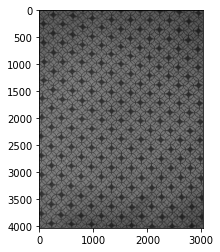

In [4]:
bilayer = np.array(ImageOps.grayscale(Image.open('IMG_2358.png')))
plt.imshow(bilayer, "gray")

First calculate the FFT of the image above.

In [5]:
Nx = len(bilayer[0])
Ny = len(bilayer)
x = np.linspace(-10,10,Nx)
y = np.linspace(-10,10,Ny)

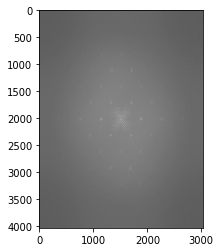

In [6]:
Fbilayer = np.fft.fft2(bilayer)
Fbilayercenter = np.fft.fftshift(Fbilayer)
plt.imshow(np.log(1+np.abs(Fbilayercenter)), "gray")

### Filter 1 - High Pass Filter

Looking at the image's fourier data, peaks in the data can be seen in a diamond shape around the center with one larger peak at the center of the image.  The area surrounding diamond patterned peaks also appears to be slightly lighter than the outer edges of the image.  This larger, dimmer peak could be the result of lower frequency periodicities in the pattern.  The goal of the high pass filter should therefore be to filter out all of these peaks.

A simple high pass filter in the shape of an ellipse was applied to the image's matrix in the spectral domain.  All frequency data inside the ellipse $R = x^2 + y^2$, where x and y are arrays of same size as the image and R = 8, were zeroed.  The ellipse filters out a considerable amount of the fourier data, however this is necessary because the larger, dimmer peak extends to near the edges of the fourier image.  The inverse FFT was then applied to the image fourier data multiplied by the highpass filter.  


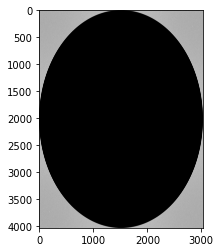

In [7]:
R = 10
xx, yy = np.meshgrid(x, y, sparse=True)
highpass = (np.sqrt(xx**2 + yy**2) >= R)*1
plt.imshow(np.log(1+np.abs(highpass*Fbilayercenter)), "gray")

In [8]:
filtered_hp = np.fft.ifft2(highpass*Fbilayercenter)

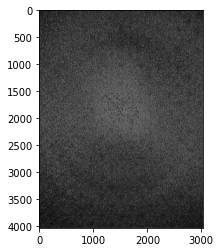

In [9]:
plt.imshow(np.log(1+np.abs(filtered_hp)), "gray")

### High Pass Filter Result

The high pass filter was mostly successful in filtering out the periodic pattern.  